In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [26]:
data= pd.read_csv('/content/Creditcard_data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
data['Class'].value_counts()

,count
Class,
0,763
1,9


In [28]:
X = data.drop('Class', axis=1)
y = data['Class']

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
ros= RandomOverSampler(random_state=42)
X_bal, y_bal = ros.fit_resample(X_scaled, y)
pd.Series(y_bal).value_counts()


,count
Class,
0,763
1,763


In [30]:
samples=[]
for i in range(5):
  X_s, _, y_s, _ = train_test_split(
      X_bal, y_bal, test_size=0.2, random_state=i
  )
  samples.append((X_s, y_s))

In [31]:
sampling_methods ={
    "Sampling1_RandomUnder": RandomUnderSampler(random_state=1),
    "Sampling2_RandomOver": RandomOverSampler(random_state=2),
    "Sampling3_SMOTE": SMOTE(random_state=3),
    "Sampling4_None": None,
    "Sampling5_SMOTE": SMOTE(random_state=5)
}

In [32]:
models={
    "M1_Logistic": LogisticRegression(max_iter=1000),
    "M2_DecisionTree": DecisionTreeClassifier(),
    "M3_RandomForest": RandomForestClassifier(),
    "M4_NaiveBayes": GaussianNB(),
    "M5_KNN": KNeighborsClassifier()
}

In [33]:
results=pd.DataFrame(index=models.keys(), columns=sampling_methods.keys())
for m_name, model in models.items():
  for s_name, sampler in sampling_methods.items():
    X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)
    if sampler is not None:
      X_train, y_train = sampler.fit_resample(X_train, y_train)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    results.loc[m_name, s_name] = round(acc, 2)

In [34]:
results

,Sampling1_RandomUnder,Sampling2_RandomOver,Sampling3_SMOTE,Sampling4_None,Sampling5_SMOTE
M1_Logistic,91.7,91.7,91.7,91.7,91.7
M2_DecisionTree,98.47,98.25,98.25,98.47,98.47
M3_RandomForest,99.78,99.56,100.0,99.78,100.0
M4_NaiveBayes,77.95,78.38,77.73,78.17,78.38
M5_KNN,96.29,96.51,96.51,96.51,96.51


In [35]:
results = results.astype(float)

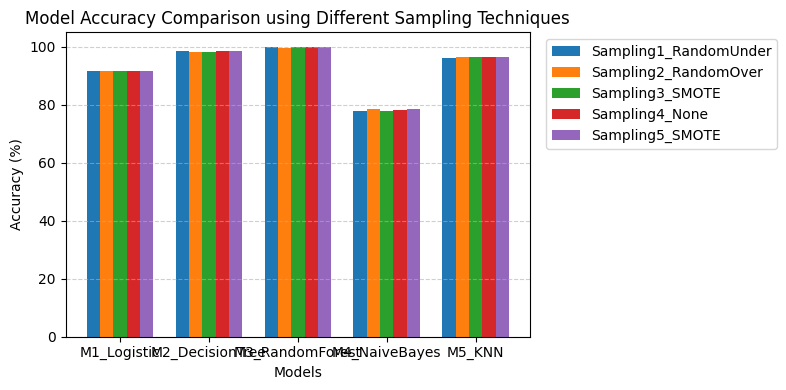

In [37]:
import matplotlib.pyplot as plt
models = results.index.tolist()
samplings = results.columns.tolist()
x = np.arange(len(models))
width = 0.15
plt.figure(figsize=(8, 4))
for i, samp in enumerate(samplings):
  plt.bar(x + i*width, results[samp], width, label=samp)
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison using Different Sampling Techniques")
plt.xticks(x + width*2, models)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("sampling_accuracy_comparison.png", dpi=300)
plt.show()